In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('./../data/Real-life+example.csv')

In [4]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
data = data.dropna(axis=0)

In [8]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [9]:
data = data.drop(['Model'], axis=1)

In [10]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


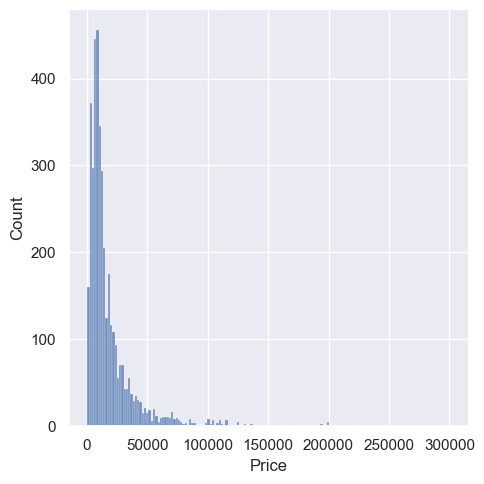

In [11]:
sns.displot(data['Price'])

In [12]:
q = data['Price'].quantile(0.99)
data = data[data['Price']<q]
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


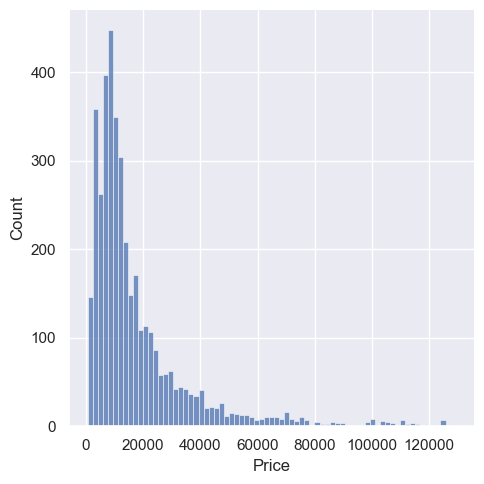

In [13]:
sns.displot(data['Price'])

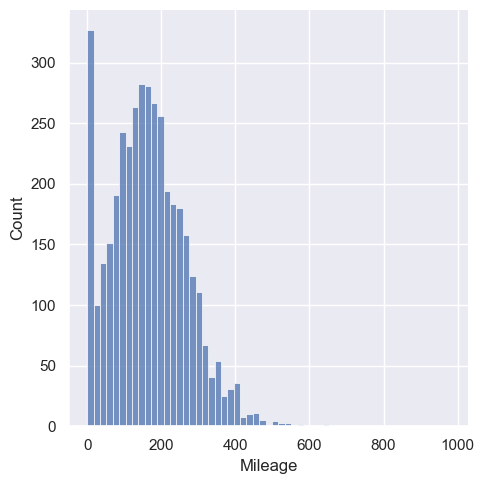

In [14]:
sns.displot(data['Mileage'])

In [15]:
q = data['Mileage'].quantile(0.99)
data = data[data['Mileage']<q]
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


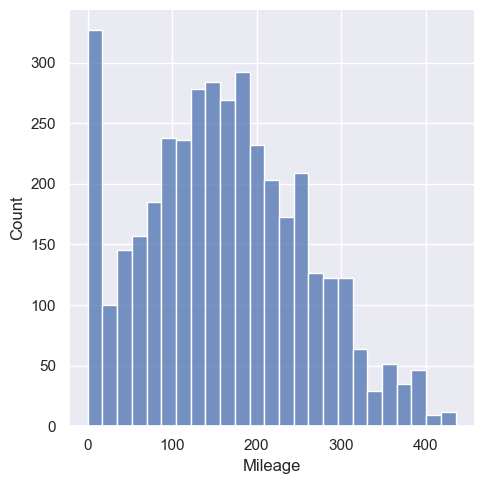

In [16]:
sns.displot(data['Mileage'])

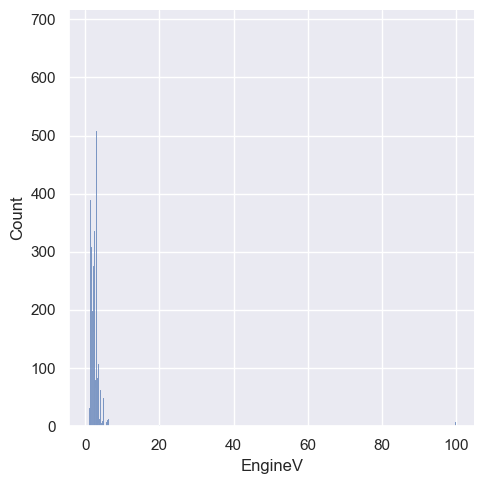

In [17]:
sns.displot(data['EngineV'])

In [18]:
data = data[data['EngineV']<6.5]
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


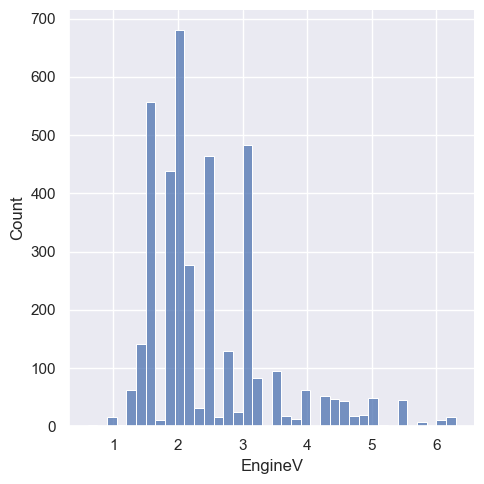

In [19]:
sns.displot(data['EngineV'])

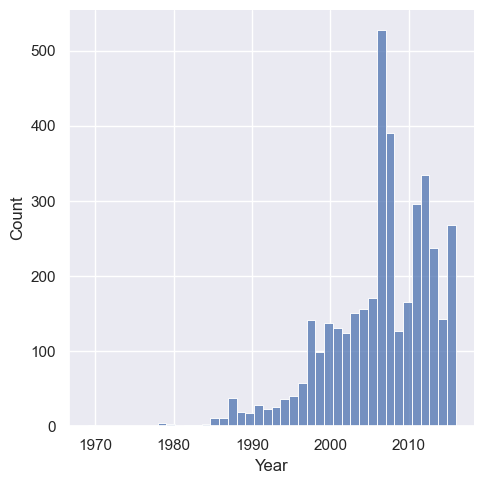

In [20]:
sns.displot(data['Year'])

In [21]:
q = data['Year'].quantile(0.01)
data = data[data['Year']>q]
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


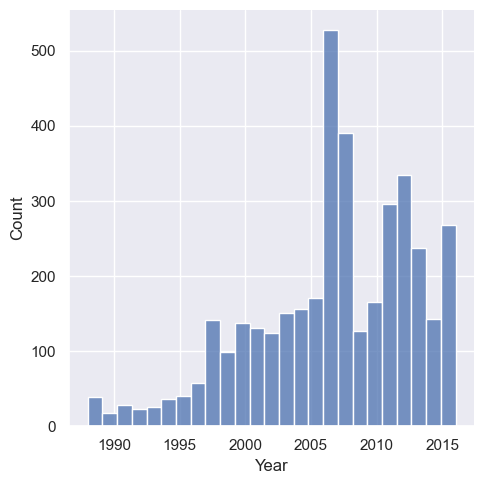

In [22]:
sns.displot(data['Year'])

In [23]:
data = data.reset_index(drop=True)

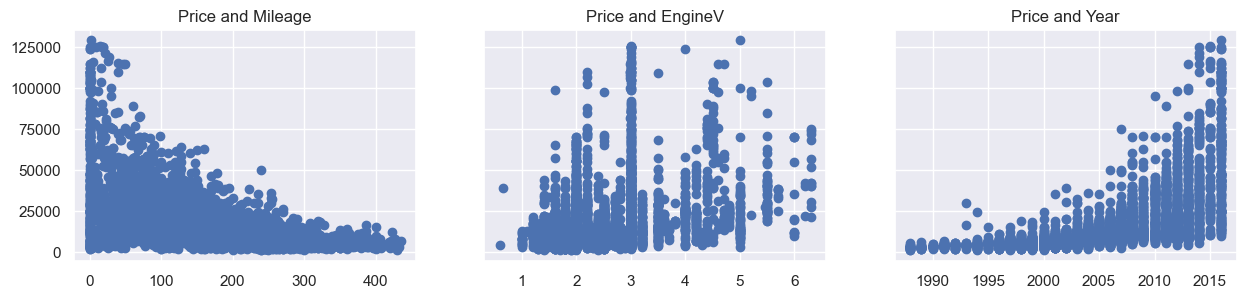

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data['Mileage'], data['Price'])
ax1.set_title('Price and Mileage')
ax2.scatter(data['EngineV'], data['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data['Year'], data['Price'])
ax3.set_title('Price and Year')
plt.show()

In [25]:
log_price = np.log(data['Price'])
data['log_price'] = log_price
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


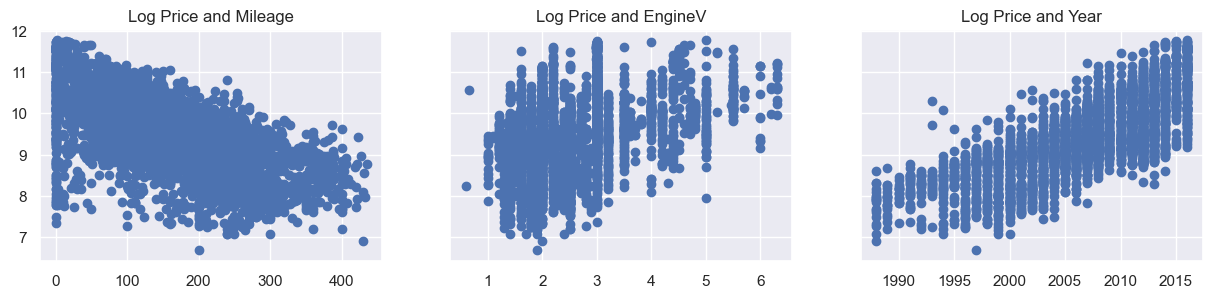

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data['Mileage'], data['log_price'])
ax1.set_title('Log Price and Mileage')
ax2.scatter(data['EngineV'], data['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data['Year'], data['log_price'])
ax3.set_title('Log Price and Year')
plt.show()

In [27]:
data = data.drop(['Price'], axis=1)

In [28]:
data.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


In [29]:
variables = data[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif

,features,VIF
0,Mileage,3.791584
1,EngineV,7.662068
2,Year,10.354854


In [30]:
data = data.drop(['Year'], axis=1)

In [31]:
data.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,9.985068


In [32]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [33]:
dummy_cols = data.select_dtypes(include='bool').columns
data[dummy_cols] = data[dummy_cols].astype(int)
data.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [34]:
data.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [35]:
columns = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data = data[columns]
data.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [36]:
y = data['log_price']
x = data.drop(['log_price'], axis=1)

In [37]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [39]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [40]:
def adj_r2(x, y):
    r2 = reg.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)

reg_summary = pd.DataFrame({
    'Features': x.columns.values,
    'Bias': reg.intercept_,
    'Weights': reg.coef_,
    'F-Statistic': f_regression(x_train, y_train)[0].round(3),
    'P-Value': f_regression(x_train, y_train)[1].round(3),
    'R-Square': reg.score(x_train, y_train),
    'Adj. R-Square': adj_r2(x_train, y_train)
})

reg_summary

,Features,Bias,Weights,F-Statistic,P-Value,R-Square,Adj. R-Square
0,Mileage,9.421004,-0.468156,1935.437,0.000,0.754649,0.753292
1,EngineV,9.421004,0.215268,644.335,0.000,0.754649,0.753292
2,Brand_BMW,9.421004,0.011052,19.600,0.000,0.754649,0.753292
3,Brand_Mercedes-Benz,9.421004,0.005692,47.259,0.000,0.754649,0.753292
4,Brand_Mitsubishi,9.421004,-0.142472,22.891,0.000,0.754649,0.753292
5,Brand_Renault,9.421004,-0.187693,140.751,0.000,0.754649,0.753292
6,Brand_Toyota,9.421004,-0.065297,69.096,0.000,0.754649,0.753292
7,Brand_Volkswagen,9.421004,-0.098989,32.768,0.000,0.754649,0.753292
8,Body_hatch,9.421004,-0.139808,67.557,0.000,0.754649,0.753292
9,Body_other,9.421004,-0.093845,4.769,0.029,0.754649,0.753292


In [41]:
y_hat = reg.predict(x_train)

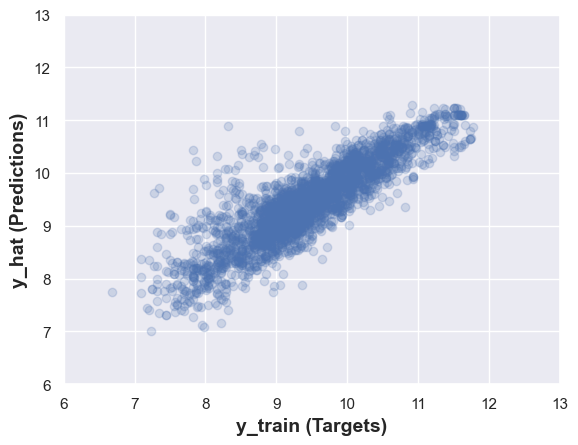

In [42]:
plt.scatter(y_train, y_hat, alpha=0.2)
plt.xlabel('y_train (Targets)', fontdict={'size': 14, 'weight': 'bold'})
plt.ylabel('y_hat (Predictions)', fontdict={'size': 14, 'weight': 'bold'})
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

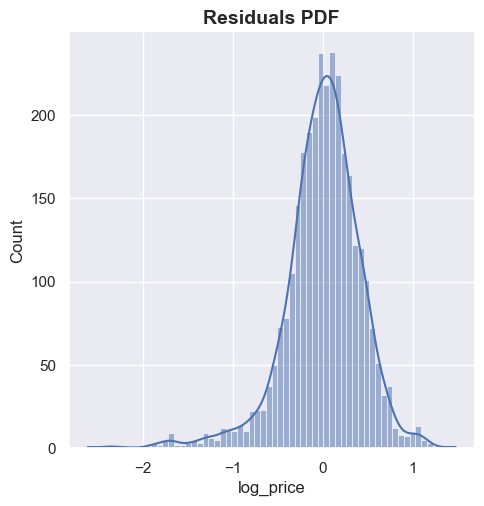

In [43]:
sns.displot(y_train-y_hat, kde=True)
plt.title('Residuals PDF', fontdict={'size': 14, 'weight': 'bold'})

In [44]:
y_hat_test = reg.predict(x_test)

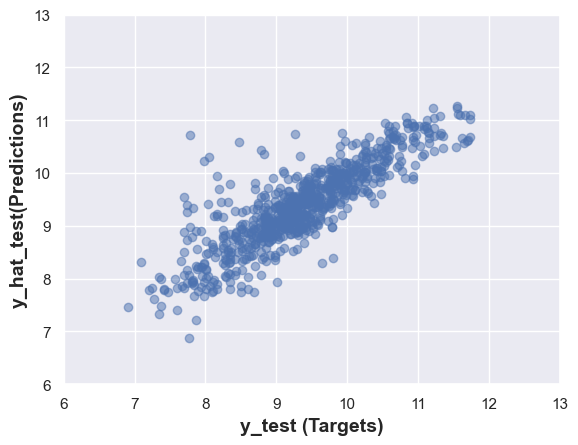

In [45]:
plt.scatter(y_test, y_hat_test, alpha=0.5)
plt.xlabel('y_test (Targets)', fontdict={'size': 14, 'weight': 'bold'})
plt.ylabel('y_hat_test(Predictions)', fontdict={'size': 14, 'weight': 'bold'})
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

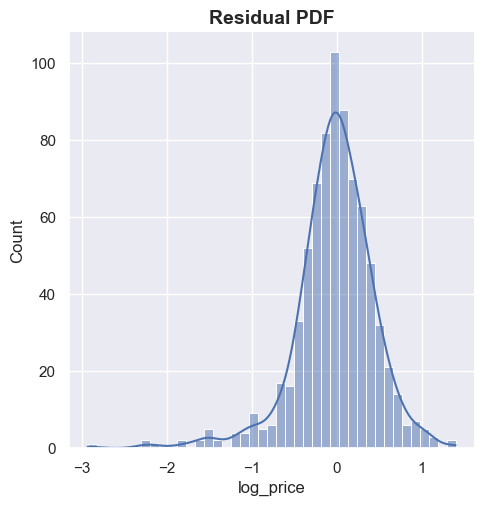

In [46]:
sns.displot(y_test-y_hat_test, kde=True)
plt.title('Residual PDF', fontdict={'size': 14, 'weight': 'bold'})

In [47]:
y_test = y_test.reset_index(drop=True)
predictions = pd.DataFrame({
    'Actual': np.exp(y_test),
    'Predictions': np.exp(y_hat_test)
})

predictions

,Actual,Predictions
0,21300.0,40419.308971
1,8900.0,7956.895960
2,3250.0,5757.284408
3,12000.0,9765.810605
4,5400.0,7027.363814
...,...,...
769,4200.0,4699.586013
770,8800.0,9123.067372
771,4850.0,6267.803094
772,27000.0,20906.128600
